## Q2, Q3 and Q7 for the input analysis problem. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy
import scipy.stats as st
import pandas as pd 
from numpy import nan
import scipy.stats as sc

In [2]:
data = pd.read_csv("TonerItDown.csv")
np.shape(data)

(7172, 7)

In [3]:
data.head(5)

,Request no,Day,Time of day,Request location,Initial diagnose time,Needs Replacement?,On-site repair time
0,1,1,0.239113,BC_10,12.633020,NaN,22.125290
1,2,1,1.139550,BC_1,19.486501,yes,NaN
2,3,1,1.309831,BC_5,16.161550,NaN,7.349665
3,4,1,1.458689,BC_4,17.991248,NaN,31.835509
4,5,1,1.754376,BC_5,16.736394,NaN,10.733933


## Q2

In [4]:
# function to calculate 95% CI of an array. 
def CI_95(X):
    mean = np.mean(X)
    LB = np.mean(X) - 1.96*np.std(X,ddof = 1)/np.sqrt(np.size(X))
    UB = np.mean(X) + 1.96*np.std(X,ddof = 1)/np.sqrt(np.size(X))
    return mean, LB, UB

In [5]:
np.shape(data[data["Needs Replacement?"] == "yes"])

(1294, 7)

In [6]:
np.shape(data[np.isnan(data["On-site repair time"])])

(1294, 7)

<br>As can be seen above, all those requests that marks need replacements have no On-site repair time available. <br>Hence we can assume that whereever On-site rapair time is nan, there we need off-site repair. 
<br>This also assumes that every offsite replacement needs repair. 
<br>We are not considering impact of hour of request on on site/off site repair decision. 
<br>There might be cases where requests are place at office closure time hence offsite rapair was done, even though on site repair would have been possible. 

In [7]:
Offsite_repair = np.isnan(data["On-site repair time"])*1
mean, LB, UB = CI_95(Offsite_repair)
print("fraction of customer requests that require off-site repair is ", mean)
print("95% CI range is ", LB,UB)

fraction of customer requests that require off-site repair is  0.1804238706079197
95% CI range is  0.17152350476732442 0.18932423644851498


<br> <b> fraction of customer requests that require off-site repair is  0.18
<br> 95% CI range is  (0.17152, 0.1893) </b>

## Q3

In [8]:
#removing nan
Onsite_repair_time = data[(data["On-site repair time"] >= 0)]["On-site repair time"]
Onsite_repair_time

0       22.125290
2        7.349665
3       31.835509
4       10.733933
5       17.075570
6       35.068595
7       37.308511
8       39.839388
9       33.003310
12      60.148816
13       8.966096
14      14.912936
15      15.048912
16      20.259774
17      20.684003
18      20.445788
19      27.010334
21      24.119693
22      26.962708
23      43.140592
25      31.767042
26      33.365783
27      33.361201
28      28.286649
29       6.430361
30      11.789026
31       6.543758
32      16.149842
33      39.471514
34      35.390860
          ...    
7142    48.139317
7143    26.597868
7144     7.611165
7145    11.502652
7146    23.033082
7147    22.864028
7148    22.489458
7149    26.950339
7150    33.695999
7151    43.063678
7152    32.248519
7153    41.778819
7154    20.293617
7155    44.038762
7156    14.096924
7157     8.870955
7158    24.957760
7159    27.968556
7160    19.889866
7161     3.440138
7162     7.941069
7163     8.403874
7164    42.663299
7165    32.908809
7166    35

(array([ 454., 1189., 1407., 1183.,  907.,  426.,  213.,   76.,   15.,
           8.]),
 array([ 0.16205745,  7.7866848 , 15.41131216, 23.03593951, 30.66056686,
        38.28519422, 45.90982157, 53.53444892, 61.15907627, 68.78370363,
        76.40833098]),
 <a list of 10 Patch objects>)

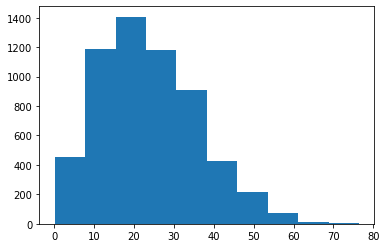

In [9]:
plt.hist(Onsite_repair_time)

<b>Prima facie from the histogram following distributions looks worth exploring: Normal, Beta, Raleigh, Gamma</b>

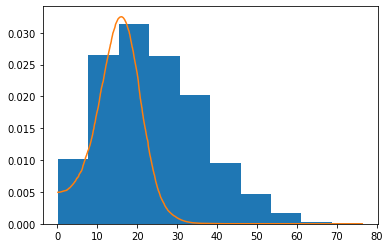

In [10]:
## Norm

loc,scale = sc.norm.fit(Onsite_repair_time)
x = np.sort(Onsite_repair_time)
plt.hist(x,density = 1)
u = np.arange(0,80,80/np.size(x))
fx = sc.norm.pdf(u,loc,scale)
plt.plot(x, fx);

KstestResult(statistic=0.04893708722810736, pvalue=1.1858345823398563e-12)

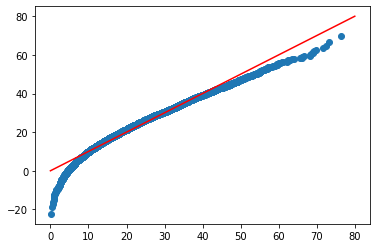

In [11]:
#Quantiles of distribution
n = np.size(x)
u = (range(1,n+1) - 0.5*np.ones(n))/n
Dis = sc.norm.ppf(u,loc,scale)
plt.scatter(x,Dis)
plt.plot([0,80],[0,80],c='r')

sc.kstest(x,'norm',args = (loc,scale)) # if pval > 0.05 fail to reject null hypothesis

2.617986716241127 7.461801823981 -0.46574608609621293 93.45180392115793


/Users/ankitajain/anaconda3/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:515: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


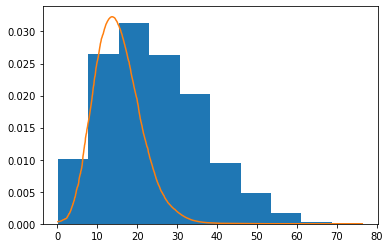

In [12]:
## Beta

a,b,loc,scale = sc.beta.fit(Onsite_repair_time)
print(a,b,loc,scale)

x = np.sort(Onsite_repair_time)
plt.hist(x,density = 1)
u = np.arange(0,80,80/n)
fx = sc.beta.pdf(u,a,b,loc,scale)
plt.plot(x, fx)

KstestResult(statistic=0.009315652385251283, pvalue=0.687462279791315)

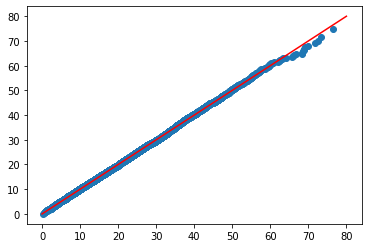

In [13]:
#Quantiles of distribution
u = (range(1,n+1) - 0.5*np.ones(n))/n
Dis = sc.beta.ppf(u,a,b,loc,scale)
plt.scatter(x,Dis)
plt.plot([0,80],[0,80],c='r')

sc.kstest(x,'beta',args = (a,b,loc,scale)) # if pval > 0.05 fail to reject null hypothesis

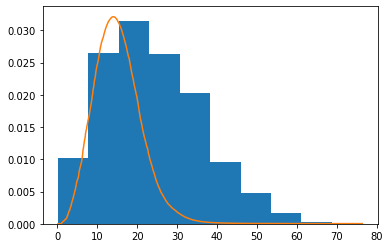

In [14]:
## Raleigh

loc,scale = sc.rayleigh.fit(Onsite_repair_time)

x = np.sort(Onsite_repair_time)
plt.hist(x,density = 1)
u = np.arange(0,80,80/n)
fx = sc.rayleigh.pdf(u,loc,scale)
plt.plot(x, fx);

KstestResult(statistic=0.010357084645583159, pvalue=0.5538395344963649)

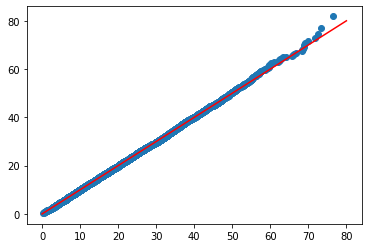

In [15]:
#Quantiles of distribution

u = (range(1,n+1) - 0.5*np.ones(n))/n
Dis = sc.rayleigh.ppf(u,loc,scale)
plt.scatter(x,Dis)
plt.plot([0,80],[0,80],c='r')

sc.kstest(x,'rayleigh',args = (loc,scale)) # if pval > 0.05 fail to reject null hypothesis

5.326346074135864 -5.120337470139379 5.432227543631485


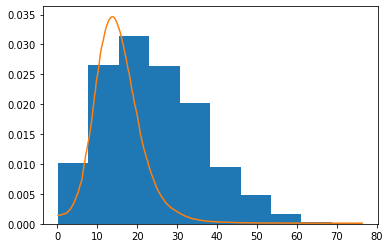

In [16]:
## Gamma

a,loc,scale = sc.gamma.fit(Onsite_repair_time)
print (a,loc,scale)
x = np.sort(Onsite_repair_time)
plt.hist(x,density = 1)
u = np.arange(0,80,80/n)
fx = sc.gamma.pdf(u,a,loc,scale)
plt.plot(x, fx);

KstestResult(statistic=0.02314073447651188, pvalue=0.003690049174504887)

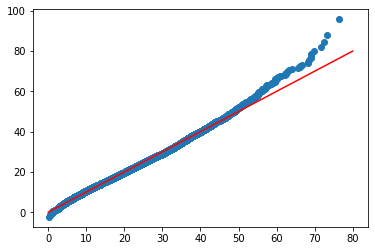

In [17]:
#Quantiles of distribution
u = (range(1,n+1) - 0.5*np.ones(n))/n
Dis = sc.gamma.ppf(u,a,loc,scale)
plt.scatter(x,Dis)
plt.plot([0,80],[0,80],c='r')

sc.kstest(x,'gamma',args = (a,loc,scale)) # if pval > 0.05 fail to reject null hypothesis

<br>From Q-Q plots - Beta,Raleigh and Gamma - all three looks good fit. However, going by p-value of ks test (at 95% level), we will be <b>modelling on-site repair time as Beta Distribution with parameters (a = 2.61, b=7.46, loc = -0.4657, sclae = 93.4518).</b>

<br>For Normal, p-value = 1.1858345823398563e-12
<br><b>For Beta, p-value = 0.687462279791315 </b>
<br>For Raleigh, p-value = 0.5538395344963649  
<br>For Gamma, p-value = 0.003690049174504887

## Q7

<br>"Van operators indicate that swapping a broken copier for a working one at the dispatch center can take as little <br>as 10 minutes, or as much as 25 minutes, but usually takes about 15 minutes."

<br>"Van operators indicated this usually takes about 30 minutes, but can take anywhere from 20 minutes to an hour"

<br><b>We will be using triangular distribution for copy swap times at both dispatch center and customer location. As we are given min, max and mode (most usual time) for both process. </b>

<br>For swap time at dispatch center (all in minutes): 
<br>min = 10
<br>most likely = 15
<br>max = 25

<br>For swap time at dispatch center (all in minutes): 
<br>min = 20
<br>most likely = 30
<br>max = 60

In [19]:
swap_time_dispatch = np.random.triangular(10, 15, 25, size=1)  #unit in minutes. 
swap_time_customer = np.random.triangular(20, 30, 60, size=1)  #unit in minutes. 
print("sample dispatch swap time: ",swap_time_dispatch)
print("sample customer swap time: ",swap_time_customer)

sample dispatch swap time:  [14.04920264]
sample customer swap time:  [34.55339658]
